<a href="https://colab.research.google.com/github/christianlozano99/ChristianLozano/blob/master/NaiveBayes_MalignantTumorPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Christian Lozano Assigment 3 Spring 2021**

### **Load in data from CSV Files**


*   Load CSV file sfor testing and training
*   Import some basic libraies such as pandas and numpy


**Fufilled Requiments on this cell:**
1. You must load the data from provided CSV files

In [ ]:
import numpy as np 
import pandas as pd
import pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score



testDF = pd.read_csv('test.csv')
trainDF = pd.read_csv('train.csv')
trainDF

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,0,14.480,21.46,94.25,648.2,0.09444,0.09947,0.120400,0.049380,0.2075,0.05636,0.4204,2.2200,3.3010,38.870,0.009369,0.029830,0.053710,0.017610,0.02418,0.003249,16.210,29.25,108.40,808.9,0.13060,0.19760,0.334900,0.122500,0.3020,0.06846,1
1,1,14.920,14.93,96.45,686.9,0.08098,0.08549,0.055390,0.032210,0.1687,0.05669,0.2446,0.4334,1.8260,23.310,0.003271,0.017700,0.023100,0.008399,0.01148,0.002379,17.180,18.22,112.00,906.6,0.10650,0.27910,0.315100,0.114700,0.2688,0.08273,0
2,2,12.810,13.06,81.29,508.8,0.08739,0.03774,0.009193,0.013300,0.1466,0.06133,0.2889,0.9899,1.7780,21.790,0.008534,0.006364,0.006180,0.007408,0.01065,0.003351,13.630,16.15,86.70,570.7,0.11620,0.05445,0.027580,0.039900,0.1783,0.07319,0
3,3,13.200,17.43,84.13,541.6,0.07215,0.04524,0.043360,0.011050,0.1487,0.05635,0.1630,1.6010,0.8730,13.560,0.006261,0.015690,0.030790,0.005383,0.01962,0.002250,13.940,27.82,88.28,602.0,0.11010,0.15080,0.229800,0.049700,0.2767,0.07198,0
4,4,12.470,17.31,80.45,480.1,0.08928,0.07630,0.036090,0.023690,0.1526,0.06046,0.1532,0.7810,1.2530,11.910,0.003796,0.013710,0.013460,0.007096,0.01536,0.001541,14.060,24.34,92.82,607.3,0.12760,0.25060,0.202800,0.105300,0.3035,0.07661,0
5,5,11.460,18.16,73.59,403.1,0.08853,0.07694,0.033440,0.015020,0.1411,0.06243,0.3278,1.0590,2.4750,22.930,0.006652,0.026520,0.022210,0.007807,0.01894,0.003411,12.680,21.61,82.69,489.8,0.11440,0.17890,0.122600,0.055090,0.2208,0.07638,0
6,6,11.320,27.08,71.76,395.7,0.06883,0.03813,0.016330,0.003125,0.1869,0.05628,0.1210,0.8927,1.0590,8.605,0.003653,0.016470,0.016330,0.003125,0.01537,0.002052,12.080,33.75,79.82,452.3,0.09203,0.14320,0.108900,0.020830,0.2849,0.07087,0
7,7,13.610,24.69,87.76,572.6,0.09258,0.07862,0.052850,0.030850,0.1761,0.06130,0.2310,1.0050,1.7520,19.830,0.004088,0.011740,0.017960,0.006880,0.01323,0.001465,16.890,35.64,113.20,848.7,0.14710,0.28840,0.379600,0.132900,0.3470,0.07900,1
8,8,12.560,19.07,81.92,485.8,0.08760,0.10380,0.103000,0.043910,0.1533,0.06184,0.3602,1.4780,3.2120,27.490,0.009853,0.042350,0.062710,0.019660,0.02639,0.004205,13.370,22.43,89.02,547.4,0.10960,0.20020,0.238800,0.092650,0.2121,0.07188,0
9,9,12.030,17.93,76.09,446.0,0.07683,0.03892,0.001546,0.005592,0.1382,0.06070,0.2335,0.9097,1.4660,16.970,0.004729,0.006887,0.001184,0.003951,0.01466,0.001755,13.070,22.25,82.74,523.4,0.10130,0.07390,0.007732,0.027960,0.2171,0.07037,0


### **Preprocessing Data**
Dropping id column from the test data and training data and looking to see if theres any missing data segments. Since it return 0 for both sets of the test data frame and the training one we have no missing values.

**Fufilled Requiments on this cell:**
2. You must check for missing values within the training data.
3. If the training data contains missing values, you must describe and implement an approach to handle those missing values.

Droping the id columns and checking for missing values in data.
No missing values were found in the data so no need to do anything for it.


In [ ]:
trainDF = trainDF.drop('id', axis = 1)
testDF = testDF.drop('id', axis = 1)


print(trainDF.isnull().sum().sum())
print(testDF.isnull().sum().sum())

0
0


**Outliers**

Here I looked at the box plots generated I did not drop any outliars because the plots seemed fairly distributed. I also decided not to implement standardization or normalization because it doesnt have to do with distances or simularites unlike K-NN.

**Fufilled Requiments on this cell:**
4. You must check for outliers within the training data.
5. If the training data contains outliers, you must describe and implement an approach to handle those outliers.
6. You must determine whether or not you will implement normalization or standardization, and explain your decision.

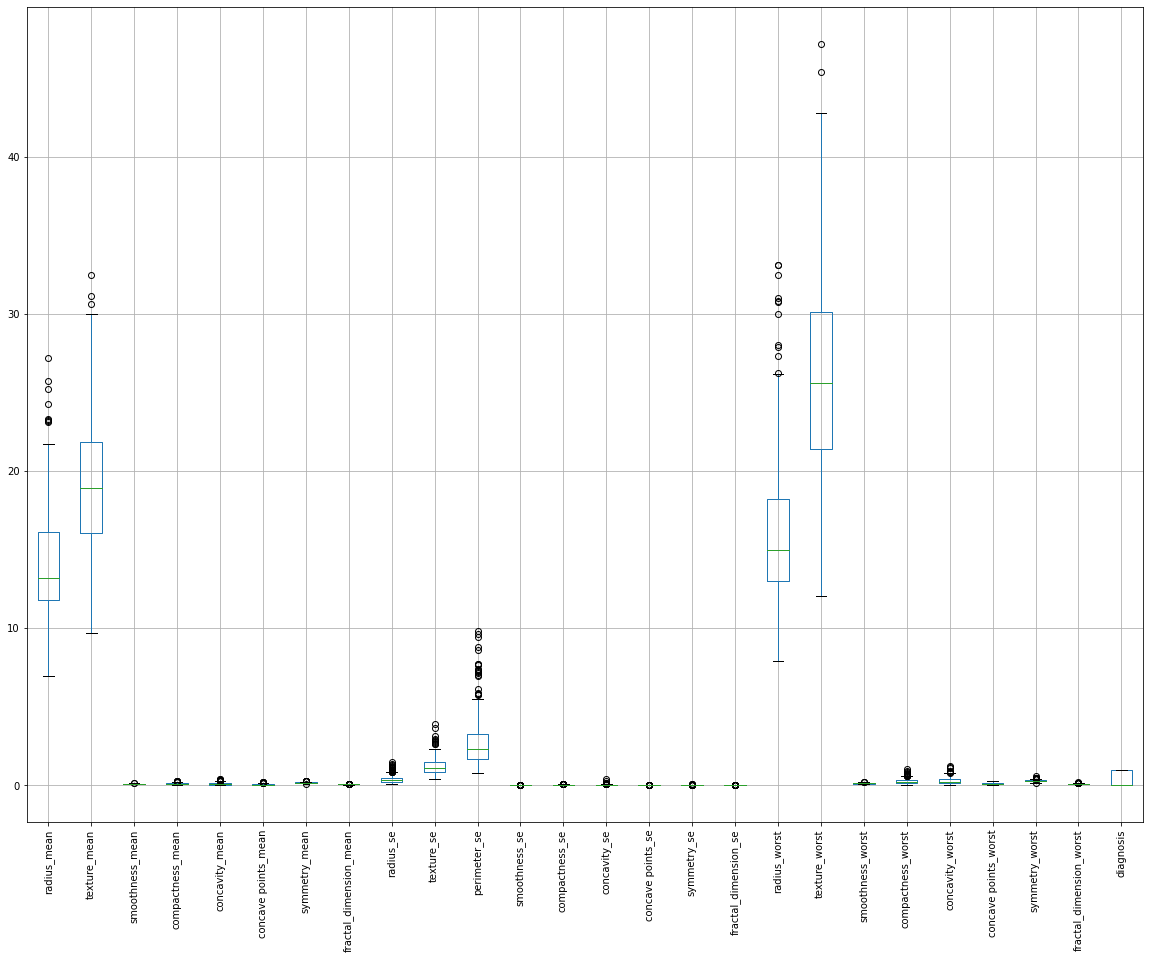

In [ ]:
trainDF.loc[:, trainDF.columns[trainDF.max()<=100].to_list()].boxplot(figsize=(20,15),rot =90)

###**Naive Bayes Model**


*   I chose to use the Gaussian Naive Bayes model because this is a classfication problem, since we are trying to find a yes or no answer of: is the tumor malignant or benign.
*   I made a model based on diffrent test splits to see which one would produce the highest f1,roc and accuracy scores.


**Fufilled Requiments on this cell:**
7. You must build and train a naive bayes model on the training data.
Be aware that sklearn has multiple models for Naive Bayes. You will need to find the one that works best.
8. You must plot the sampling distribution for the ROC AUC score, F1 score, and accuracy score for each model that you build in your notebook.
These scores must be calculated against the training and test data
9. Once you have decided on a Naive Bayes model, you must justify this decision. This justification must be based on an understanding of the algorithm and not "because it gave me a better score" - why do you think that the model gave you the better score? Points will be deducted for bad grammar. (descision explaination above) 

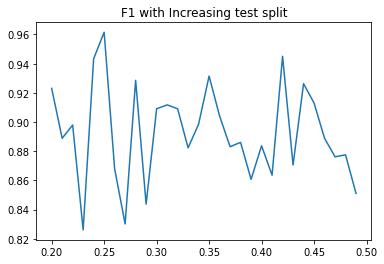

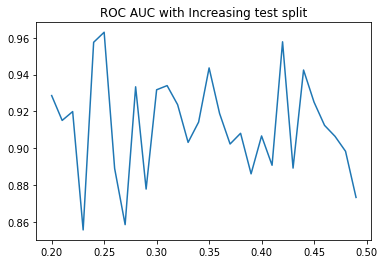

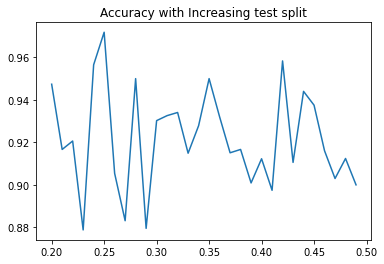

In [ ]:
results = []
for n in range(20, 50):
  y = trainDF['diagnosis']
  X = trainDF.drop('diagnosis',axis = 1)
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = n/100, stratify = y )
  gnb = GaussianNB()
  y_pred = gnb.fit(X_train, y_train).predict(X_test)
  f1_val = f1_score(y_test, y_pred)
  roc_val = roc_auc_score(y_test, y_pred)
  acc_score = accuracy_score(y_test, y_pred)
  results.append([n/100, f1_val, roc_val,acc_score])

results = pd.DataFrame(results, columns=["n", "f1", "roc_val","acc_score"])

plt.plot(results.n, results.f1)
plt.title("F1 with Increasing test split")
plt.show()
plt.plot(results.n, results.roc_val)
plt.title("ROC AUC with Increasing test split")
plt.show()
plt.plot(results.n, results.acc_score)
plt.title("Accuracy with Increasing test split")
plt.show()

Showing the highest value of what i just graphed for personal readability.

In [ ]:
#f1col = results['f1']
percentF1 = results['f1'].idxmax
percentROC = results['roc_val'].idxmax
percentAcc = results['acc_score'].idxmax


print('higest f1:', results['f1'][percentF1], 'at' ,results['n'][percentF1], 'test split')
print('higest roc_auc:', results['roc_val'][percentROC], 'at' ,results['n'][percentROC], 'test split')
print('higest accuracy :', results['acc_score'][percentAcc], 'at' ,results['n'][percentAcc], 'test split')

higest f1: 0.9615384615384615 at 0.25 test split
higest roc_auc: 0.962962962962963 at 0.25 test split
higest accuracy : 0.971830985915493 at 0.25 test split


Making the test split and final model for what I will use to predict the target vector. I choose .25 split because on average the best scores ranged from .20 to .30 in my function above.

In [ ]:
y = trainDF['diagnosis']
X = trainDF.drop('diagnosis',axis = 1)


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, stratify = y )

In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

###**Predicting the target vector**
Predicting what will be the output of the test file.

**Fufilled Requiments on this cell:**
10. You must predict the target vector for the test data (from test.csv) using your model.
11. I displayed the out put for my predicted target vector this made me get a 0.95609 on kaggle.

In [ ]:
y_predict = gnb.predict(testDF)

submission = pd.DataFrame({"diagnosis": y_predict})
submission.to_csv('submission.csv', index =True, index_label = 'id')
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(submission)

     diagnosis
0            0
1            0
2            0
3            1
4            1
5            0
6            1
7            0
8            1
9            1
10           0
11           0
12           1
13           1
14           0
15           1
16           0
17           0
18           0
19           0
20           0
21           1
22           0
23           0
24           0
25           1
26           0
27           0
28           0
29           0
30           1
31           0
32           0
33           1
34           0
35           0
36           0
37           0
38           0
39           0
40           0
41           0
42           0
43           0
44           1
45           1
46           0
47           0
48           1
49           0
50           0
51           0
52           1
53           0
54           0
55           0
56           0
57           0
58           1
59           0
60           0
61           0
62           0
63           0
64           0
65        